<!--NAVIGATION-->
<[Week-05-01-Data-Preprocessing-04](Week-05-01-Data-Preprocessing-04-(Time_Series).ipynb) | [Contents](Index.ipynb) | [Week-05-03-Data-Preprocessing-06](Week-05-03-Data-Preprocessing-06-(Text-String).ipynb)  >

### This section

You will learn about how to deal with Categorical Data. It directly shows an analysis example using "flights.csv" dataset. 

### Preparation

------
Dataset
- flight.csv




# Processing the Categorical Data

This section addresses several techniques to handle categorical data. Some of the techniques are as follows:

- __Replacing values__

it is to replace categorical data with an understandable defined code (e.g., 1, 2, 3, etc.)

- __Encoding labels__

It is to encode the labels into numerical code

- __One-Hot encoding__

It is to encode the labels 


- __Binary encoding__

It is to encode the label into binary, that is lower dimension than one-hot encoding (to handle the curse of dimensionality)

- __Miscellaneous features__

Sometimes you may encounter categorical feature columns which specify the ranges of values for observation points, for example, the age column might be described in the form of categories like 0-20, 20-40 and so on.


In [1]:
import pandas as pd
import numpy as np
import copy
%matplotlib inline

In [2]:
df_flights = pd.read_csv('https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv')

df_flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


|Column Name| Description|
|---------|-------|
|year  | The year of the flight |
|month | the month of the flight |
|day   | the day of the flight |
|dep_time | the departure time |
|dep_delay | the delay time of departure|
| arr_time | the arrival time |
| arr_delay | the delay time of arrival |
| carrier | the airline name |
| tailnum | the detail tail aircraft number |
| flight | the flight number |
| origin | the origin of the flight |
| dest | the destination of the flight |
| air_time | the travel time from origin to destination |
|distance | the distance from origin to destination |
| hour | the travel distance in hour |
| minute | the travel distance in minute |

|IATA_CODE|AIRLINE|
|---------|-------|
|UA | United Air Lines Inc.|
|AA | American Airlines Inc. |
|US| US Airways Inc. |
|F9|Frontier Airlines Inc.|
|B6 |JetBlue Airways|
|OO |Skywest Airlines Inc.|
|AS | Alaska Airlines Inc.|
|NK | Spirit Air Lines |
|WN |Southwest Airlines Co.|
|DL |Delta Air Lines Inc.|
|EV |Atlantic Southeast Airlines|
|HA |Hawaiian Airlines Inc. |
| MQ|American Eagle Airlines Inc.|
|VX|Virgin America|

The next step is to gather some information about different column in your DataFrame. You can do so by using .info(), which basically gives you information about the number of rows, columns, column data types, memory usage, etc.

In [3]:
print(df_flights.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162049 entries, 0 to 162048
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       162049 non-null  int64  
 1   month      162049 non-null  int64  
 2   day        162049 non-null  int64  
 3   dep_time   161192 non-null  float64
 4   dep_delay  161192 non-null  float64
 5   arr_time   161061 non-null  float64
 6   arr_delay  160748 non-null  float64
 7   carrier    162049 non-null  object 
 8   tailnum    161801 non-null  object 
 9   flight     162049 non-null  int64  
 10  origin     162049 non-null  object 
 11  dest       162049 non-null  object 
 12  air_time   160748 non-null  float64
 13  distance   162049 non-null  int64  
 14  hour       161192 non-null  float64
 15  minute     161192 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.8+ MB
None


As you can see, columns like year, month and day are read as integers, and dep_time, dep_delay etc. are read as floats.

The columns with object dtype are the possible categorical features in your dataset.

The reason why you would say that these categorical features are 'possible' is because you shouldn't not completely rely on .info() to get the real data type of the values of a feature, as some missing values that are represented as strings in a continuous feature can coerce it to read them as object dtypes.

You can plot a boxplot by invoking .boxplot() on your DataFrame. Here, you will plot a boxplot of the dep_time column with respect to the two origin of the flights from PDX and SEA. (SEA in Seattle and PDX in Portland)

<AxesSubplot:title={'center':'dep_time'}, xlabel='origin'>

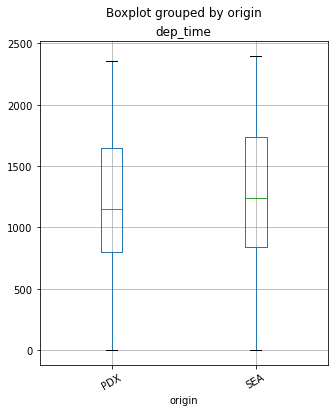

In [4]:
df_flights.boxplot('dep_time','origin',rot = 30,figsize=(5,6))

As you will only be dealing with categorical features in this tutorial, it's better to filter them out. You can create a separate DataFrame consisting of only these features by running the following command. The method .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one.

In [5]:
cat_df_flights = df_flights.select_dtypes(include=['object']).copy()

In [6]:
cat_df_flights.head()

,carrier,tailnum,origin,dest
0,AS,N508AS,PDX,ANC
1,US,N195UW,SEA,CLT
2,UA,N37422,PDX,IAH
3,US,N547UW,PDX,CLT
4,AS,N762AS,SEA,ANC


One of the most common data pre-processing steps is to check for null values in the dataset. You can get the total number of missing values in the DataFrame by the following one liner code:

In [7]:
print(cat_df_flights.isnull().values.sum())

248


Let's also check the column-wise distribution of null values:

In [8]:
print(cat_df_flights.isnull().sum())

carrier      0
tailnum    248
origin       0
dest         0
dtype: int64


Note the chaining of method .value_counts() in the code below. This returns the frequency distribution of each category in the feature, and then selecting the top category, which is the mode, with the .index attribute.

In [ ]:
# select the mode (the categorical values with the highest counts)
cat_df_flights['tailnum'].value_counts().index[0]

In [9]:
# replace the missing values with the modes
cat_df_flights = cat_df_flights.fillna(cat_df_flights['tailnum'].value_counts().index[0])

Let's check the number of null values after imputation should result in a zero count.

In [10]:
print(cat_df_flights.isnull().values.sum())

0


Another Exploratory Data Analysis (EDA) step that you might want to do on categorical features is the frequency distribution of categories within the feature, which can be done with the .value_counts() method as described earlier.

In [11]:
print(cat_df_flights['carrier'].value_counts())

AS    62460
WN    23355
OO    18710
DL    16716
UA    16671
AA     7586
US     5946
B6     3540
VX     3272
F9     2698
HA     1095
Name: carrier, dtype: int64


To know the count of distinct categories within the feature you can chain the previous code with the .count() method:

In [12]:
print(cat_df_flights['carrier'].value_counts().count())

11


Visual exploration is the most effective way to extract information between variables.

Below is a basic template to plot a barplot of the frequency distribution of a categorical feature using the seaborn package, which shows the frequency distribution of the carrier column. You can play with different arguments to change the look of the plot. If you want to learn more about seaborn, you can take a look at this tutorial.

D:\Programs\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


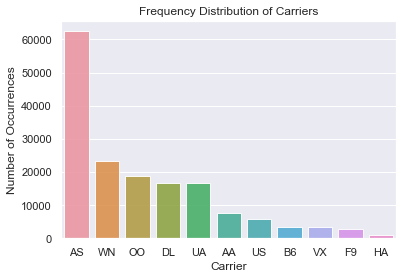

In [13]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = cat_df_flights['carrier'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

Similarly, you could plot a pie chart with the matplotlib library to get the same information. The labels list below holds the category names from the carrier column:

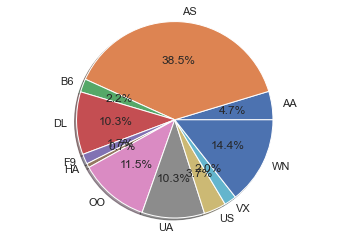

In [14]:
labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()
counts = cat_df_flights['carrier'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()


## Encoding Categorical Data
You will now learn different techniques to encode the categorical features to numeric quantities. To keep it simple, you will apply these encoding methods only on the carrier column. However, the same approach can be extended to all columns.

The techniques that you'll cover are the following:

- Replacing values
- Encoding labels
- One-Hot encoding
- Binary encoding
- Backward difference encoding
- Miscellaneous features

### Replace Values
Let's start with the most basic method, which is just replacing the categories with the desired numbers. This can be achieved with the help of the replace() function in pandas. The idea is that you have the liberty to choose whatever numbers you want to assign to the categories according to the business use case.

You will now create a dictionary which contains mapping numbers for each category in the carrier column:

In [15]:
replace_map = {'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4,
                                  'F9': 5, 'HA': 6, 'OO': 7 , 'UA': 8 , 'US': 9,'VX': 10,'WN': 11}}

Note that defining a mapping via a hard coded dictionary is easy when the number of categories is low, like in this case which is 11. You can achieve the same mapping with the help of dictionary comprehensions as shown below. This will be useful when the categories count is high and you don't want to type out each mapping. You will store the category names in a list called labels and then zip it to a seqeunce of numbers and iterate over it.

In [16]:
labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()
replace_map_comp = {'carrier' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4, 'F9': 5, 'HA': 6, 'OO': 7, 'UA': 8, 'US': 9, 'VX': 10, 'WN': 11}}


Throughout this tutorial, you will be making a copy of the dataset via the .copy() method to practice each encoding technique to ensure that the original DataFrame stays intact and whatever changes you are doing happen only in the copied one.

In [17]:
cat_df_flights_replace = cat_df_flights.copy()

Use the replace() function on the DataFrame by passing the mapping dictionary as argument:

In [18]:
cat_df_flights_replace.replace(replace_map_comp, inplace=True)

print(cat_df_flights_replace.head())

   carrier tailnum origin dest
0        2  N508AS    PDX  ANC
1        9  N195UW    SEA  CLT
2        8  N37422    PDX  IAH
3        9  N547UW    PDX  CLT
4        2  N762AS    SEA  ANC


As you can observe, you have encoded the categories with the mapped numbers in your DataFrame.

You can also check the dtype of the newly encoded column, which is now converted to integers.

In [19]:
print(cat_df_flights_replace['carrier'].dtypes)

int64


In Python, it's a good practice to typecast categorical features to a category dtype because they make the operations on such columns much faster than the object dtype. You can do the typecasting by using .astype() method on your columns like shown below:

In [20]:
cat_df_flights_lc = cat_df_flights.copy()
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].astype('category')
cat_df_flights_lc['origin'] = cat_df_flights_lc['origin'].astype('category')                                                              

print(cat_df_flights_lc.dtypes)

carrier    category
tailnum      object
origin     category
dest         object
dtype: object


You can validate the faster operation of the category dtype by timing the execution time of the same operation done on a DataFrame with columns as category dtype and object dtype by using the time library.

In [21]:
import time
%timeit cat_df_flights.groupby(['origin','carrier']).count() #DataFrame with object dtype columns

40.4 ms ± 2.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
%timeit cat_df_flights_lc.groupby(['origin','carrier']).count() #DataFrame with category dtype columns

20.9 ms ± 792 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Note that the DataFrame with category dtype is much faster.

## Label Encoding
Another approach is to encode categorical values with a technique called "label encoding", which allows you to convert each value in a column to a number. Numerical labels are always between 0 and n_categories-1.

You can do label encoding via attributes .cat.codes on your DataFrame's column.

In [23]:
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].cat.codes

In [24]:
cat_df_flights_lc.head() #alphabetically labeled from 0 to 10

,carrier,tailnum,origin,dest
0,1,N508AS,PDX,ANC
1,8,N195UW,SEA,CLT
2,7,N37422,PDX,IAH
3,8,N547UW,PDX,CLT
4,1,N762AS,SEA,ANC


Sometimes, you might just want to encode a bunch of categories within a feature to some numeric value and encode all the other categories to some other numeric value.

You could do this by using numpy's where() function like shown below. You will encode all the US carrier flights to value 1 and other carriers to value 0. This will create a new column in your DataFrame with the encodings. Later, if you want to drop the original column, you can do so by using the drop() function in pandas.

In [25]:
cat_df_flights_specific = cat_df_flights.copy()
cat_df_flights_specific['US_code'] = np.where(cat_df_flights_specific['carrier'].str.contains('US'), 1, 0)

cat_df_flights_specific.head()

,carrier,tailnum,origin,dest,US_code
0,AS,N508AS,PDX,ANC,0
1,US,N195UW,SEA,CLT,1
2,UA,N37422,PDX,IAH,0
3,US,N547UW,PDX,CLT,1
4,AS,N762AS,SEA,ANC,0


You can achieve the same label encoding using scikit-learn's LabelEncoder:

In [26]:
cat_df_flights_sklearn = cat_df_flights.copy()

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
cat_df_flights_sklearn['carrier_code'] = lb_make.fit_transform(cat_df_flights['carrier'])

cat_df_flights_sklearn.head() #Results in appending a new column to df

,carrier,tailnum,origin,dest,carrier_code
0,AS,N508AS,PDX,ANC,1
1,US,N195UW,SEA,CLT,8
2,UA,N37422,PDX,IAH,7
3,US,N547UW,PDX,CLT,8
4,AS,N762AS,SEA,ANC,1


Label encoding is pretty much intuitive and straight-forward and may give you a good performance from your learning algorithm, but it has as disadvantage that the numerical values can be misinterpreted by the algorithm. Should the carrier US (encoded to 8) be given 8x more weight than the carrier AS (encoded to 1) ?

To solve this issue there is another popular way to encode the categories via something called one-hot encoding.

## One-Hot encoding
The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly.

There are many libraries out there that support one-hot encoding but the simplest one is using pandas' .get_dummies() method.

This function is named this way because it creates dummy/indicator variables (1 or 0). There are mainly three arguments important here, the first one is the DataFrame you want to encode on, second being the columns argument which lets you specify the columns you want to do encoding on, and third, the prefix argument which lets you specify the prefix for the new columns that will be created after encoding.

In [27]:
cat_df_flights_onehot = cat_df_flights.copy()
cat_df_flights_onehot = pd.get_dummies(cat_df_flights_onehot, columns=['carrier'], prefix = ['carrier'])

print(cat_df_flights_onehot.head())

  tailnum origin dest  carrier_AA  carrier_AS  carrier_B6  carrier_DL  \
0  N508AS    PDX  ANC           0           1           0           0   
1  N195UW    SEA  CLT           0           0           0           0   
2  N37422    PDX  IAH           0           0           0           0   
3  N547UW    PDX  CLT           0           0           0           0   
4  N762AS    SEA  ANC           0           1           0           0   

   carrier_F9  carrier_HA  carrier_OO  carrier_UA  carrier_US  carrier_VX  \
0           0           0           0           0           0           0   
1           0           0           0           0           1           0   
2           0           0           0           1           0           0   
3           0           0           0           0           1           0   
4           0           0           0           0           0           0   

   carrier_WN  
0           0  
1           0  
2           0  
3           0  
4           0  


As you can see, the column carrier_AS gets value 1 at the 0th and 4th observation points as those points had the AS category labeled in the original DataFrame. Likewise for other columns also.

scikit-learn also supports one hot encoding via LabelBinarizer and OneHotEncoder in its preprocessing module (check out the details here). Just for the sake of practicing you will do the same encoding via LabelBinarizer:

In [28]:
cat_df_flights_onehot_sklearn = cat_df_flights.copy()

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(cat_df_flights_onehot_sklearn['carrier'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

print(lb_results_df.head())

   AA  AS  B6  DL  F9  HA  OO  UA  US  VX  WN
0   0   1   0   0   0   0   0   0   0   0   0
1   0   0   0   0   0   0   0   0   1   0   0
2   0   0   0   0   0   0   0   1   0   0   0
3   0   0   0   0   0   0   0   0   1   0   0
4   0   1   0   0   0   0   0   0   0   0   0


Note that this lb_results_df resulted in a new DataFrame with only the one hot encodings for the feature carrier. This needs to be concatenated back with the original DataFrame, which can be done via pandas' .concat() method. The axis argument is set to 1 as you want to merge on columns.

In [29]:
result_df = pd.concat([cat_df_flights_onehot_sklearn, lb_results_df], axis=1)

print(result_df.head())

  carrier tailnum origin dest  AA  AS  B6  DL  F9  HA  OO  UA  US  VX  WN
0      AS  N508AS    PDX  ANC   0   1   0   0   0   0   0   0   0   0   0
1      US  N195UW    SEA  CLT   0   0   0   0   0   0   0   0   1   0   0
2      UA  N37422    PDX  IAH   0   0   0   0   0   0   0   1   0   0   0
3      US  N547UW    PDX  CLT   0   0   0   0   0   0   0   0   1   0   0
4      AS  N762AS    SEA  ANC   0   1   0   0   0   0   0   0   0   0   0


While one-hot encoding solves the problem of unequal weights given to categories within a feature, it is not very useful when there are many categories, as that will result in formation of as many new columns, which can result in the curse of dimensionality. The concept of the “curse of dimensionality” discusses that in high-dimensional spaces some things just stop working properly.

## Binary Encoding
This technique is not as intuitive as the previous ones. In this technique, first the categories are encoded as ordinal, then those integers are converted into binary code, then the digits from that binary string are split into separate columns. This encodes the data in fewer dimensions than one-hot.

You can do binary encoding via a number of ways but the simplest one is using the category_encoders library. You can install category_encoders via pip install category_encoders on cmd or just download and extract the .tar.gz file from the site.

You have to first import the category_encoders library after installing it. Invoke the BinaryEncoder function by specifying the columns you want to encode and then call the .fit_transform() method on it with the DataFrame as the argument.

In [31]:
!pip install category_encoders

In [32]:
cat_df_flights_ce = cat_df_flights.copy()

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['carrier'])
df_binary = encoder.fit_transform(cat_df_flights_ce)

df_binary.head()

D:\Programs\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,carrier_0,carrier_1,carrier_2,carrier_3,carrier_4,tailnum,origin,dest
0,0,0,0,0,1,N508AS,PDX,ANC
1,0,0,0,1,0,N195UW,SEA,CLT
2,0,0,0,1,1,N37422,PDX,IAH
3,0,0,0,1,0,N547UW,PDX,CLT
4,0,0,0,0,1,N762AS,SEA,ANC


Notice that four new columns are created in place of the carrier column with binary encoding for each category in the feature.

Note that category_encoders is a very useful library for encoding categorical columns. Not only does it support one-hot, binary and label encoding, but also other advanced encoding methods like Helmert contrast, polynomial contrast, backward difference, etc.

## Miscellaneous Features
Sometimes you may encounter categorical feature columns which specify the ranges of values for observation points, for example, the age column might be described in the form of categories like 0-20, 20-40 and so on.

While there can be a lot of ways to deal with such features, the most common ones are either split these ranges into two separate columns or replace them with some measure like the mean of that range.

You will first create a dummy DataFrame which has just one feature age with ranges specified using the pandas DataFrame function. Then you will split the column on the delimeter - into two columns start and end using split() with a lambda() function. If you want to learn more about lambda functions, check out this tutorial.

In [34]:
dummy_df_age = pd.DataFrame({'age': ['0-20', '20-40', '40-60','60-80']})
dummy_df_age['start'], dummy_df_age['end'] = zip(*dummy_df_age['age'].map(lambda x: x.split('-')))

dummy_df_age.head()

,age,start,end
0,0-20,0,20
1,20-40,20,40
2,40-60,40,60
3,60-80,60,80


To replace the range with its mean, you will write a split_mean() function which basically takes one range at a time, splits it, then calculates the mean and returns it. To apply a certain function to all the entities of a column you will use the .apply() method:

In [35]:
dummy_df_age = pd.DataFrame({'age': ['0-20', '20-40', '40-60','60-80']})

def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0])+float(split_list[1]))/2
    return mean

dummy_df_age['age_mean'] = dummy_df_age['age'].apply(lambda x: split_mean(x))

dummy_df_age.head()

,age,age_mean
0,0-20,10.0
1,20-40,30.0
2,40-60,50.0
3,60-80,70.0


## Summary

This section addresses several techniques to handle categorical data. Some of the techniques are as follows:

- Replacing values
- Encoding labels
- One-Hot encoding
- Binary encoding
- Miscellaneous features

https://www.datacamp.com/community/tutorials/categorical-data

https://pbpython.com/categorical-encoding.html